In [1]:
import scipy.stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

$\renewcommand{\CI}{\operatorname{CI}}$
$\renewcommand{\SE}{\operatorname{SE}}$

In [2]:
agpop = pd.read_csv("data/agpop.csv")
N = len(agpop)
agpop

,county,state,acres92,acres87,acres82,farms92,farms87,farms82,largef92,largef87,largef82,smallf92,smallf87,smallf82,region
0,ALEUTIAN ISLANDS AREA,AK,683533,726596,764514,26,27,28,14,16,20,6,4,1,W
1,ANCHORAGE AREA,AK,47146,59297,256709,217,245,223,9,10,11,41,52,38,W
2,FAIRBANKS AREA,AK,141338,154913,204568,168,175,170,25,28,21,12,18,25,W
3,JUNEAU AREA,AK,210,214,127,8,8,12,0,0,0,5,4,8,W
4,KENAI PENINSULA AREA,AK,50810,85712,98035,93,119,137,9,18,17,12,18,19,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,SWEETWATER COUNTY,WY,1720737,1682608,1697370,154,183,148,43,50,48,12,22,16,W
3074,TETON COUNTY,WY,62307,72197,71567,102,110,117,18,21,26,11,13,14,W
3075,UINTA COUNTY,WY,879694,873210,749526,265,283,242,81,97,87,18,37,16,W
3076,WASHAKIE COUNTY,WY,397883,391069,342499,207,225,230,61,70,61,14,20,26,W


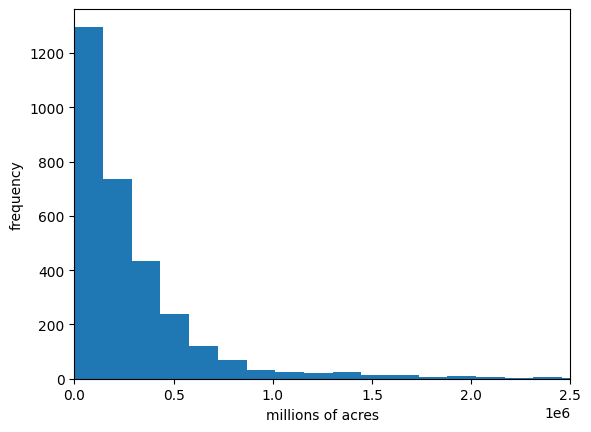

In [3]:
Y = agpop.acres92
plt.hist(Y, bins=50)
plt.xlim(0, 2.5e6)
plt.xlabel("millions of acres")
plt.ylabel("frequency")
plt.show()

In [4]:
agsrs = pd.read_csv("data/agsrs.csv")
n = len(agsrs)
agsrs

,county,state,acres92,acres87,acres82,farms92,farms87,farms82,largef92,largef87,largef82,smallf92,smallf87,smallf82,region
0,COFFEE COUNTY,AL,175209,179311,194509,760,842,944,29,28,21,57,47,66,S
1,COLBERT COUNTY,AL,138135,145104,161360,488,563,686,37,41,42,12,44,47,S
2,LAMAR COUNTY,AL,56102,59861,72334,299,362,447,4,4,3,16,20,30,S
3,MARENGO COUNTY,AL,199117,220526,231207,434,471,622,48,66,62,14,11,28,S
4,MARION COUNTY,AL,89228,105586,113618,566,658,748,7,9,9,11,23,27,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,OZAUKEE COUNTY,WI,78772,85201,89331,448,483,527,6,5,5,56,49,48,NC
296,ROCK COUNTY,WI,343115,357751,362206,1398,1518,1680,64,66,55,138,160,165,NC
297,KANAWHA COUNTY,WV,19956,21369,23073,158,177,199,0,0,0,8,10,10,S
298,PLEASANTS COUNTY,WV,15650,15716,16097,111,89,98,1,0,0,2,0,1,S


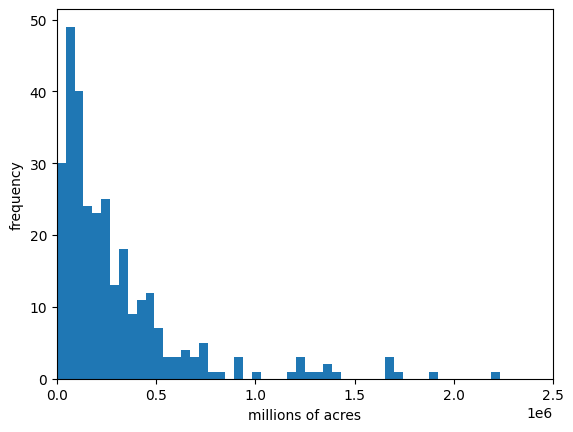

In [5]:
y = agsrs.acres92
plt.hist(y, bins=50)
plt.xlim(0, 2.5e6)
plt.xlabel("millions of acres")
plt.ylabel("frequency")
plt.show()


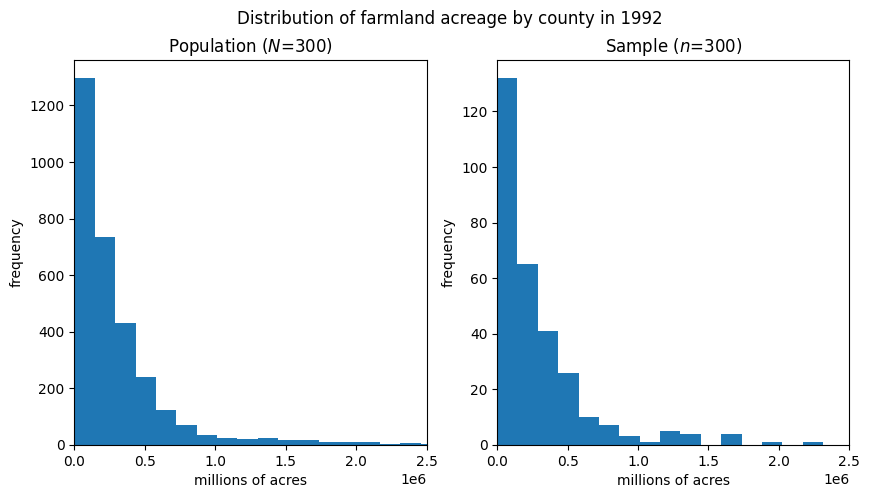

In [6]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Distribution of farmland acreage by county in 1992")

_, bins, __ = ax0.hist(agpop.acres92, bins=50)
ax0.set_xlim(0, 2.5e6)
ax0.set_xlabel("millions of acres")
ax0.set_ylabel("frequency")
ax0.set_title(f"Population ($N$={n})")

ax1.hist(agsrs.acres92, bins=bins)
ax1.set_xlim(0, 2.5e6)
ax1.set_xlabel("millions of acres")
ax1.set_ylabel("frequency")
ax1.set_title(f"Sample ($n$={len(agsrs)})")

plt.show()


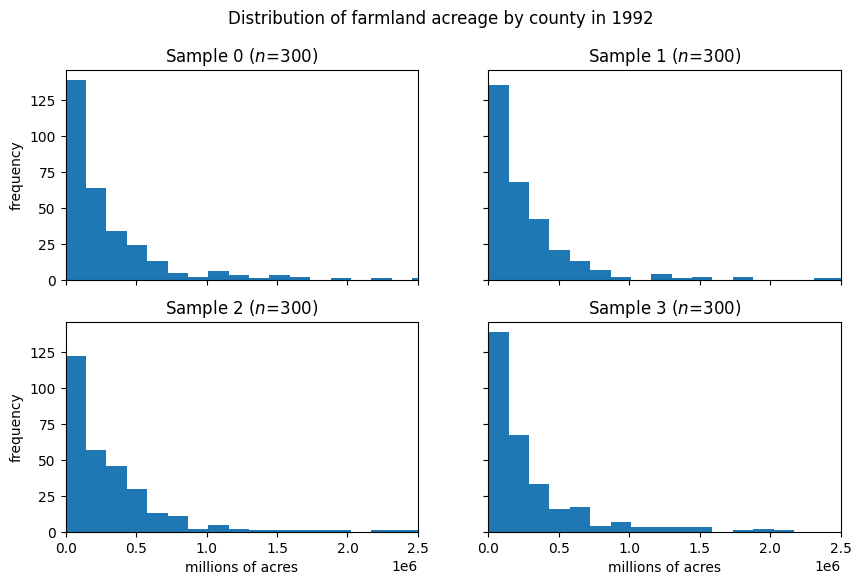

In [7]:
rng = np.random.default_rng(42)

fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
fig.suptitle("Distribution of farmland acreage by county in 1992")

for i, ax in enumerate(axes.ravel()):
    sample = agpop.sample(300, random_state=rng)
    ax.hist(sample.acres92, bins=bins)
    ax.set_xlim(0, 2.5e6)
    if i == 2 or i == 3:
        ax.set_xlabel("millions of acres")
    if i == 0 or i == 2:
        ax.set_ylabel("frequency")
    ax.set_title(f"Sample {i} ($n$={len(agsrs)})")

plt.show()

# Distribution of sample means

Sample means appear to be *normally distributed*.

$$
f(x) = \frac1{s\sqrt{2\pi}}e^{-(x - m)^2/2s^2}
$$

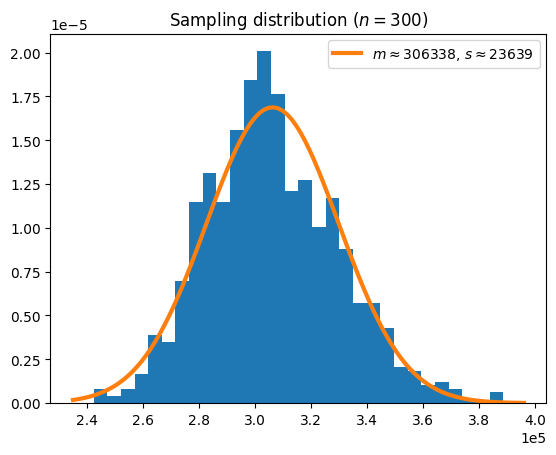

In [8]:
n = 300
rng = np.random.default_rng(42)

n_iter = 1000
sample_means = np.zeros(n_iter)
for i in range(n_iter):
    sample = agpop.sample(300, random_state=rng)
    y = sample.acres92
    sample_means[i] = y.mean()

plt.hist(sample_means, bins=30, density=True)
plt.ticklabel_format(axis='x', style='sci', scilimits=(5, 5))

m = sample_means.mean()
s = sample_means.std()
amin, amax = plt.xlim()
a = np.linspace(amin, amax, 100)
f = 1/(s*np.sqrt(2*np.pi))*np.exp(-(a-m)**2/(2*s**2))
plt.plot(a, f, lw=3, label=f"$m\\approx{int(m)}$, $s\\approx{int(s)}$")
plt.title(f"Sampling distribution ($n={n}$)")
plt.legend()
plt.show()

If $n$, $N$, and $N-n$ are all "sufficiently large", then the sampling distribution is "well-approximated" by
$$
N\left(\mu=\bar{y}_U,\; \sigma=\sqrt{1 - \frac nN}\frac S{\sqrt n}\right).
$$

Said differently,
$$
\dfrac{\bar{y}_I - \bar{y}_U}{\sqrt{1 - \dfrac nN}\dfrac S{\sqrt n}} \sim N(0, 1).
$$

The precise formulation of this result is a version of the Central Limit Theorm due to Hájek (1960).

Note that the population parameters $\mu=\bar{y}_U$ and $\displaystyle\sigma=\sqrt{1 - \frac nN}\frac S{\sqrt n}$ are typically unknowable. However, they can be estimated. Estimate $\mu$ by $\bar{y}_I$ and $\sigma$ by
$$
\SE(\bar{y}_I) = \sqrt{1 - \frac nN}\frac{s_I}{\sqrt n}.
$$
The random variable $\SE(\bar{y}_I)$ is called the *standard error of $\bar{y}_I$*.


In [9]:
S = Y.std()
c = np.sqrt((1-n/N)/n)
sigma = c*S
print(f"sigma = {sigma:.2f}")

y = agsrs.acres92
s = y.std()
SE = c*s
print(f"SE = {SE:.2f}")

sigma = 23293.77
SE = 18898.43


## Example 2.1

In [10]:
y = np.array([1, 2, 4, 4, 7, 7, 7, 8])
y.sum()

40

In [11]:
def subsets(k, n):
    """Generate subsets of size k from {0, 1, ..., n - 1}."""
    if type(k) != int or type(n) != int:
        raise ValueError("k and n must be integers.")
    if k < 0 or n < 0:
        raise ValueError("k and n must be nonnegative.")
    if k > n:
        raise ValueError("k cannot be larger than n.")
    if k == 0:
        return [[]]
    elif k == n:
        return [list(range(n))]
    else: # k < n
        return subsets(k, n - 1) + [[*s, n - 1] for s in subsets(k - 1, n - 1)]

$$
\begin{aligned}
\bar{y}_I &= \frac1n\sum_{i\in I}y_i &&\text{(sample mean)}\\
s^2_I &= \frac1{n-1}\sum_{i\in I}(y_i - \bar{y}_I)^2&&\text{(sample variance)}
\end{aligned}
$$

Confidence interval:
$$
\CI_I = [\bar{y}_I - \tfrac12s_I, \bar{y}_I + \tfrac12s_I]
$$

In [12]:
n = 4
I = []
y_bar_I = []
s_I = []
a_I = []
b_I = []
for J in sorted(subsets(4, 8)):
    I.append(str(set(J)))
    y_bar_J = y[J].mean()
    y_bar_I.append(y_bar_J)
    s_J = np.sqrt(sum((y[J] - y_bar_J)**2)/(n - 1))
    s_I.append(s_J)
    a_J = y_bar_J - 0.5*s_J
    a_I.append(a_J)
    b_J = y_bar_J + 0.5*s_J
    b_I.append(b_J)


df = pd.DataFrame({"I": I, "y_bar_I": y_bar_I, "s_I": s_I, "a_I": a_I, "b_I": b_I})

c_I = np.logical_and(df.a_I <= y.mean(), y.mean() <= df.b_I)
df["c_I"] = c_I

print(f"{c_I.mean()*100:.2f}% of the intervals contain sum(y).")
df

77.14% of the intervals contain sum(y).


,I,y_bar_I,s_I,a_I,b_I,c_I
0,"{0, 1, 2, 3}",2.75,1.500000,2.000000,3.500000,False
1,"{0, 1, 2, 4}",3.50,2.645751,2.177124,4.822876,False
2,"{0, 1, 2, 5}",3.50,2.645751,2.177124,4.822876,False
3,"{0, 1, 2, 6}",3.50,2.645751,2.177124,4.822876,False
4,"{0, 1, 2, 7}",3.75,3.095696,2.202152,5.297848,True
...,...,...,...,...,...,...
65,"{3, 4, 5, 6}",6.25,1.500000,5.500000,7.000000,False
66,"{3, 4, 5, 7}",6.50,1.732051,5.633975,7.366025,False
67,"{3, 4, 6, 7}",6.50,1.732051,5.633975,7.366025,False
68,"{3, 5, 6, 7}",6.50,1.732051,5.633975,7.366025,False


### A large sample $100(1-\alpha)\%$ confidence interval

Define the *standard error*:
$$
\SE(\bar{y}_I) = \sqrt{1 - \frac nN}\frac{s_I}{\sqrt n}
$$

Let $z_{\alpha/2}$ be the $(1-\alpha/2)$-th percentile of the standard normal distribution.

Definition: The interval
$$
[\bar{y}_I - z_{\alpha/2}\SE(\bar{y}_I),\; \bar{y}_I + z_{\alpha/2}\SE(\bar{y}_I)]
$$
is called the *large sample $100(1-\alpha)\%$ confidence interval*.

Heuristic: If $n$, $N$, and $N-n$ are all "sufficiently large" then
$$
\bar{y}\in [\bar{y}_I - z_{\alpha/2}\SE(\bar{y}_I),\; \bar{y}_I + z_{\alpha/2}\SE(\bar{y}_I)]
$$
for $\gtrsim 100(1-\alpha)\%$ of samples $I$ of size $n$.

In [13]:
agpop = pd.read_csv("data/agpop.csv")
N = len(agpop)
Y = agpop.acres92

agsrs = pd.read_csv("data/agsrs.csv")
n = len(agsrs)
y = agsrs.acres92
y_bar = y.mean()
print(f"y_bar= {y_bar:.2f}")

s = y.std()
SE = np.sqrt(1 - n/N)*s/np.sqrt(n)
print(f"SE = {SE:.2f}")

# alpha = 0.05
norm = scipy.stats.norm()
z = norm.ppf(0.975)
print(f"z = {z:.2f}")

a = y_bar - z*SE
b = y_bar + z*SE
print(f"95% confidence interval = [{a:.2f}, {b:.2f}]")


y_bar= 297897.05
SE = 18898.43
z = 1.96
95% confidence interval = [260856.80, 334937.30]


In [14]:
rng = np.random.default_rng(42)
Y_bar = Y.mean()

z = scipy.stats.norm().ppf(0.975)
# z = scipy.stats.t(df=n - 1).ppf(0.975)

count = 0
n_iter = 10000
for i in range(n_iter):
    sample = agpop.sample(n, random_state=rng)
    y = sample.acres92
    y_bar = y.mean()
    s = y.std()
    SE = np.sqrt(1 - n/N)*s/np.sqrt(n)
    a = y_bar - z*SE
    b = y_bar + z*SE
    if a <= Y_bar <= b:
        count += 1

print(count/n_iter)

0.9327


## In-class exercises

### Exercise 1:
Let $Y=\{0, 1, ..., 999\}$. Find the parameters of the sampling distributions of the mean for $n=50$, both without and with replacement. (For the sampling distrubution with replacement, think back to your previous stats classes.)

### Exercise 2:

Use the finite sample data in `apisrs.csv` to estimate the population mean and standard deviation of the column `api00` of `apipop.csv`.